In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.layers import LSTM, Dense
from keras.models import Sequential

In [180]:
train = pd.read_csv('testdata.csv')

In [181]:
train.head()

,Maximum,Minimum
0,28,24
1,29,23
2,32,23
3,30,23
4,27,24


In [182]:
max_training_data = train['Maximum']

In [183]:
max_training_data = np.array(max_training_data)

In [184]:
max_training_data

array([28, 29, 32, 30, 27, 26, 27, 32, 28, 34, 33, 29, 27, 29, 26, 29, 31,
       31, 29, 30, 30, 30, 28, 33, 31, 30, 30, 31, 32, 30, 30],
      dtype=int64)

In [201]:
def prepare_data(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end = i + n_steps
        if end >= len(data):
            break
        X.append(data[i:end])
        y.append(data[end])
    return np.array(X), np.array(y)

In [252]:
n_steps = 5
X, y = prepare_data(max_training_data, n_steps)

In [254]:
print(X)

[[28 29 32 30 27]
 [29 32 30 27 26]
 [32 30 27 26 27]
 [30 27 26 27 32]
 [27 26 27 32 28]
 [26 27 32 28 34]
 [27 32 28 34 33]
 [32 28 34 33 29]
 [28 34 33 29 27]
 [34 33 29 27 29]
 [33 29 27 29 26]
 [29 27 29 26 29]
 [27 29 26 29 31]
 [29 26 29 31 31]
 [26 29 31 31 29]
 [29 31 31 29 30]
 [31 31 29 30 30]
 [31 29 30 30 30]
 [29 30 30 30 28]
 [30 30 30 28 33]
 [30 30 28 33 31]
 [30 28 33 31 30]
 [28 33 31 30 30]
 [33 31 30 30 31]
 [31 30 30 31 32]
 [30 30 31 32 30]]


In [255]:
print(y)

[26 27 32 28 34 33 29 27 29 26 29 31 31 29 30 30 30 28 33 31 30 30 31 32
 30 30]


In [256]:
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [257]:
X.shape

(26, 5, 1)

In [258]:
model = Sequential()

In [259]:
model.add(LSTM(35, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(35, activation='relu'))
model.add(Dense(4))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 4s 4s/step - loss: 879.9940
Epoch 2/1000
1/1 [==============================] - 0s 5ms/step - loss: 872.7051
Epoch 3/1000
1/1 [==============================] - 0s 5ms/step - loss: 865.6044
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 858.3972
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 850.7657
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 842.4776
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 833.2663
Epoch 8/1000
1/1 [==============================] - 0s 8ms/step - loss: 822.8691
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 810.9867
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 797.2813
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 781.3813
Epoch 12/1000
1/1 [==============================] - 0s 9ms/step - loss: 762.9592
Epoch 13/1000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 6.6542
Epoch 103/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.6418
Epoch 104/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.6275
Epoch 105/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.6112
Epoch 106/1000
1/1 [==============================] - 0s 8ms/step - loss: 6.5935
Epoch 107/1000
1/1 [==============================] - 0s 12ms/step - loss: 6.5754
Epoch 108/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.5574
Epoch 109/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.5394
Epoch 110/1000
1/1 [==============================] - 0s 9ms/step - loss: 6.5211
Epoch 111/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.5025
Epoch 112/1000
1/1 [==============================] - 0s 10ms/step - loss: 6.4842
Epoch 113/1000
1/1 [==============================] - 0s 5ms/step - loss: 6.4666
Epoch 114/1000
1/1 [====================

Epoch 203/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.9261
Epoch 204/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.9172
Epoch 205/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.9070
Epoch 206/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8917
Epoch 207/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.8730
Epoch 208/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.8564
Epoch 209/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.8452
Epoch 210/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.8379
Epoch 211/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.8316
Epoch 212/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8230
Epoch 213/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.8109
Epoch 214/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.7942
Epoch 215/1000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 3.3879
Epoch 304/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.3838
Epoch 305/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.3911
Epoch 306/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.3970
Epoch 307/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.3940
Epoch 308/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.3833
Epoch 309/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.3749
Epoch 310/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.3741
Epoch 311/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.3779
Epoch 312/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.3806
Epoch 313/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.3779
Epoch 314/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.3717
Epoch 315/1000
1/1 [=====================

1/1 [==============================] - 0s 10ms/step - loss: 3.2762
Epoch 405/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.2573
Epoch 406/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.2507
Epoch 407/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.2571
Epoch 408/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.2685
Epoch 409/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2741
Epoch 410/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.2719
Epoch 411/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.2610
Epoch 412/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2498
Epoch 413/1000
1/1 [==============================] - 0s 4ms/step - loss: 3.2428
Epoch 414/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.2424
Epoch 415/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2466
Epoch 416/1000
1/1 [==================

1/1 [==============================] - 0s 8ms/step - loss: 3.4271
Epoch 505/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4711
Epoch 506/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4535
Epoch 507/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2198
Epoch 508/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1122
Epoch 509/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2001
Epoch 510/1000
1/1 [==============================] - 0s 12ms/step - loss: 3.2883
Epoch 511/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.2543
Epoch 512/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.1218
Epoch 513/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.1153
Epoch 514/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.2019
Epoch 515/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.2039
Epoch 516/1000
1/1 [====================

1/1 [==============================] - 0s 8ms/step - loss: 3.6244
Epoch 605/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1626
Epoch 606/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.7637
Epoch 607/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.9278
Epoch 608/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.2140
Epoch 609/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.0641
Epoch 610/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.7400
Epoch 611/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.8768
Epoch 612/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.0834
Epoch 613/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.8432
Epoch 614/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.7218
Epoch 615/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.8957
Epoch 616/1000
1/1 [====================

1/1 [==============================] - 0s 12ms/step - loss: 2.2445
Epoch 706/1000
1/1 [==============================] - ETA: 0s - loss: 2.228 - 0s 10ms/step - loss: 2.2284
Epoch 707/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.2114
Epoch 708/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.2234
Epoch 709/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.2295
Epoch 710/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.2227
Epoch 711/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.2110
Epoch 712/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.1906
Epoch 713/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.1807
Epoch 714/1000
1/1 [==============================] - 0s 14ms/step - loss: 2.1894
Epoch 715/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.1897
Epoch 716/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.1848
Epoch 717/

1/1 [==============================] - 0s 9ms/step - loss: 1.9896
Epoch 806/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.8765
Epoch 807/1000
1/1 [==============================] - 0s 10ms/step - loss: 2.0284
Epoch 808/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.0800
Epoch 809/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.9644
Epoch 810/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.8724
Epoch 811/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.9428
Epoch 812/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.0208
Epoch 813/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.9507
Epoch 814/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.8546
Epoch 815/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.8480
Epoch 816/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9268
Epoch 817/1000
1/1 [==================

1/1 [==============================] - 0s 5ms/step - loss: 1.6246
Epoch 906/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.6576
Epoch 907/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.7580
Epoch 908/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9333
Epoch 909/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.1339
Epoch 910/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.6456
Epoch 911/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.6108
Epoch 912/1000
1/1 [==============================] - 0s 12ms/step - loss: 2.2682
Epoch 913/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5801
Epoch 914/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.1372
Epoch 915/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.4286
Epoch 916/1000
1/1 [==============================] - 0s 4ms/step - loss: 1.7891
Epoch 917/1000
1/1 [=====================

In [260]:
n_steps

5

In [268]:
x_input = np.array([30, 30, 31, 32, 30])
temp_input = list(x_input)
output = []
i = 0
while(i < n_steps):
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
#         print(f'{i} day input {x_input}')
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#         print(f'{i} day input {yhat}')
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        output.append(yhat[0][0])
        i+=1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
#         print(yhat[0])
        temp_input.append(yhat[0][0])
        output.append(yhat[0][0])
        i+=1
print(output)

[29.623774, 29.680595, 30.48245, 30.403114, 29.863546]


In [269]:
real_temperatures = [29, 31, 31, 31, 30]

In [270]:
predictions_next_4

array([[29.835283, 30.385927, 29.605095, 30.311888]], dtype=float32)

([<matplotlib.axis.YTick at 0x20fbf83c6d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

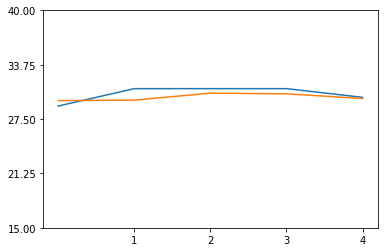

In [272]:
plt.plot(real_temperatures)
plt.plot(output)
plt.xticks([1, 2, 3, 4])  
plt.yticks(np.linspace(15, 40, 5))

In [281]:
def predictTemperatureMax():
    #Importing the required libraries
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import tensorflow as tf
    from tensorflow import keras
    from keras.layers import LSTM, Dense, Flatten
    from keras.models import Sequential
    
    #Reading the data
    train = pd.read_csv('testdata.csv')
    n_steps = 5
    #Data Preprocessing
    max_training_data = train['Maximum']
    max_training_data = np.array(max_training_data)
    X, y = [], []
    for i in range(len(max_training_data)):
        end = i + n_steps
        if end >= len(max_training_data):
            break
        X.append(max_training_data[i:end])
        y.append(max_training_data[end])
    
    # Defining the feature vector and the output vector
    X, y = prepare_data(max_training_data, n_steps)
    n_features = 1
    
    # Reshape the Feature Matrix
    X = X.reshape(X.shape[0], X.shape[1], n_features)
    
    #Create the Model
    model = Sequential()
    model.add(LSTM(35, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(35, activation='relu'))
    model.add(Dense(4))
    model.compile(optimizer = 'adam', loss = 'mse')
    
    #Fitting the Model
    model.fit(X, y, epochs=1000, verbose=0)
    
    #Testing the Fitted weights
    x_input = np.array([30, 30, 31, 32, 30])
    temp_input = list(x_input)
    output = []
    i = 0
    while(i < n_steps):
        if len(temp_input) > n_steps:
            x_input = np.array(temp_input[1:])
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            temp_input = temp_input[1:]
            output.append(yhat[0][0])
            i+=1
        else:
            x_input = x_input.reshape((1, n_steps, n_features))
            yhat = model.predict(x_input, verbose=0)
            temp_input.append(yhat[0][0])
            output.append(yhat[0][0])
            i+=1
    print(output)
    
    #Defining the real temperatures for prediction test
    real_temperatures = [29, 31, 31, 31, 30]
    
    #Plot the Graph between Real Temperature and Predicted Temperature for the next n_steps days for visualization
    plt.plot(real_temperatures)
    plt.plot(output)
    plt.xticks([1, 2, 3, 4])  
    plt.yticks(np.linspace(15, 40, 5))

[29.063972, 29.768003, 29.887892, 29.882002, 30.29553]


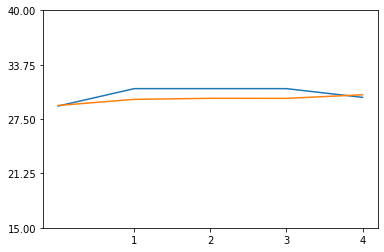

In [282]:
predictTemperatureMax()